## Observations and Insights 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID") 

# Display the data table for preview
merge_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [96]:
# Checking the number of mice.
Trial_Count=len(merge_df["Mouse ID"].unique())

print(f"There is a total of {Trial_Count} experiments ran in this study!")


There is a total of 249 experiments ran in this study!


In [97]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse=merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

In [98]:
# Optional: Get all the data for the duplicate mouse ID. 
test=merge_df[merge_df["Mouse ID"]== 'g989'] 


In [99]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df[merge_df["Mouse ID"].isin(duplicate_mouse) == False]

clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [100]:
# Checking the number of mice in the clean DataFrame.
Mouse_Count=len(clean_df["Mouse ID"].unique())

print(f"There is a total of {Mouse_Count} mice used in this study!")

There is a total of 248 mice used in this study!


## Summary Statistics

In [101]:
newthing = merge_df.groupby('Drug Regimen')
first = newthing.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

first


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [102]:

mr_df=clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean=mr_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=mr_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=mr_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd=mr_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=mr_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

analysis_df=pd.DataFrame({"mean":mean,"median":median,"var":variance, "std": sd, "sem": sem})

analysis_df=analysis_df.round(2)

analysis_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

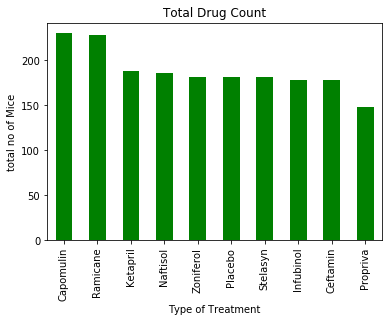

In [103]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_counts=clean_df["Drug Regimen"].value_counts()
y_axis=drug_counts.values
x_axis=drug_counts.index

drug_counts.plot(kind="bar", facecolor='g',)

#Formatting
plt.ylabel("total no of Mice")
plt.xlabel("Type of Treatment")
plt.title("Total Drug Count")
plt.xticks(rotation=90)
plt.show()


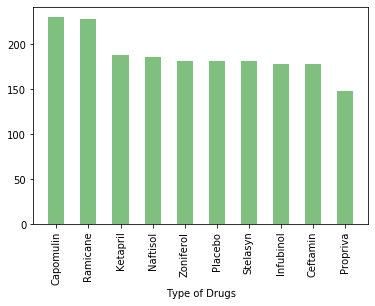

In [104]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_counts= clean_df["Drug Regimen"].value_counts()


y_axis=drug_counts.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drug_counts.index

plt.bar(x_drugs, y_axis, color='g', alpha=0.5, align= "center", width= .5)


plt.ylabel("")
plt.xlabel("Type of Drugs")
plt.title("")
plt.xticks(rotation=90)

plt.show()


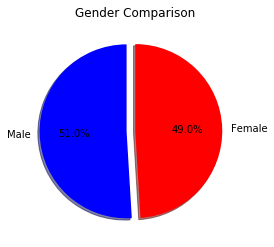

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mf_count=clean_df["Sex"].value_counts()


labels=mf_count.values


sizes=mf_count.values



colors=["blue", "red"]



explode=[0.1,0]



mf_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)


plt.title("Gender Comparison")
plt.ylabel(" ")
plt.show()

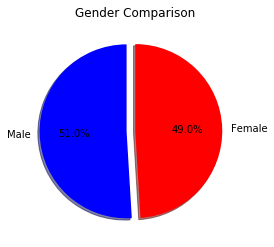

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels=mf_count.index


sizes=mf_count.values



colors=["blue", "red"]



explode=[0.1,0]



plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)


plt.title("Gender Comparison")
plt.show()


## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tumor=clean_df.groupby("Mouse ID").max().reset_index()

merge_data=max_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')

merge_data.round(2)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.97,2,Infubinol,Female,20,23
1,a251,45,65.53,1,Infubinol,Female,21,25
2,a262,45,70.72,4,Placebo,Female,17,29
3,a275,45,63.00,3,Ceftamin,Female,20,28
4,a366,30,63.44,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.71,0,Propriva,Female,12,26
244,z578,45,30.64,0,Ramicane,Male,11,16
245,z581,45,62.75,3,Infubinol,Female,24,25
246,z795,45,65.74,3,Naftisol,Female,13,29


In [108]:
capomulin= merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_data.loc[merge_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merge_data.loc[merge_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_data.loc[merge_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

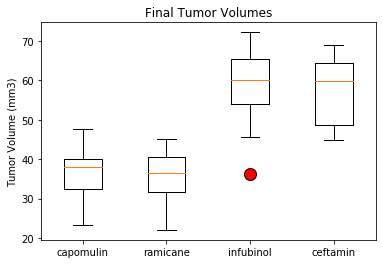

In [109]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)


plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= orange_out)


plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

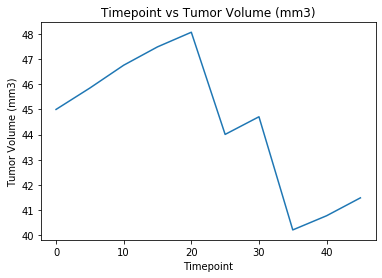

In [110]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse= clean_df.loc[clean_df['Mouse ID'] == 'l509']

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

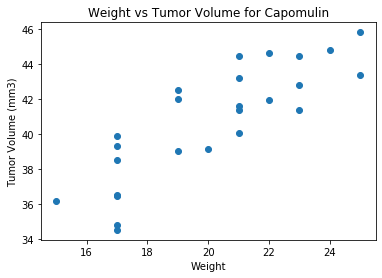

In [111]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

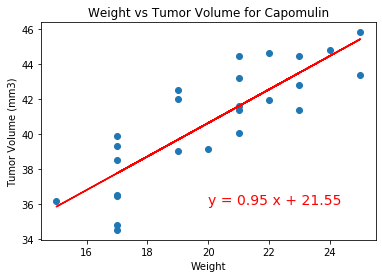

In [112]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values=cap_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), color='red', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()